<a href="https://colab.research.google.com/github/bharaniakella/Deep_work/blob/main/learning_rates_variation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
import numpy as np

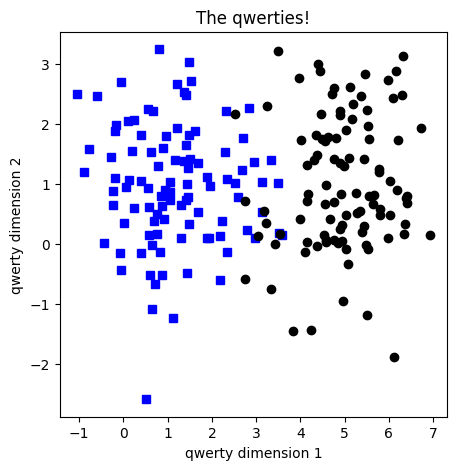

In [32]:
# parameters
nPerClust = 100
blur = 1

A = [  1, 1 ]
B = [  5, 1 ]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur , A[1]+np.random.randn(nPerClust)*blur ]
b = [ B[0]+np.random.randn(nPerClust)*blur , B[1]+np.random.randn(nPerClust)*blur ]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

# concatanate into a matrix
data_np = np.hstack((a,b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [33]:
def create_model(lr):
  ann_classify=nn.Sequential(
      nn.Linear(2,1),
      nn.ReLU(),
      nn.Linear(1,1)
  )
  optimizer=torch.optim.SGD(ann_classify.parameters(),lr=lr)
  loss_fun=nn.BCEWithLogitsLoss()
  return ann_classify, optimizer, loss_fun

In [34]:
num_epochs=500
losses=torch.zeros(num_epochs)
def train_model():
  for epochi in range(num_epochs):
    yhat=ann_classify(data)
    loss=loss_fun(yhat,labels)
    losses[epochi]=loss

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  predictions=ann_classify(data)
  final_acc=torch.mean(((predictions>0)==labels).float())
  return losses,predictions, final_acc

In [35]:
ann_classify, optimizer, loss_fun=create_model(0.01)
losses,predictions, final_acc=train_model()

In [36]:
final_acc

tensor(0.5000)

In [37]:
accByLR=[]
all_lr=torch.linspace(0.001,1,40)
all_losses=torch.zeros(len(all_lr),num_epochs)
for i,lr in enumerate(all_lr):
  ann_classify, optimizer, loss_fun=create_model(lr)
  losses,predictions, final_acc=train_model()

  accByLR.append(final_acc)
  all_losses[i,:]=losses


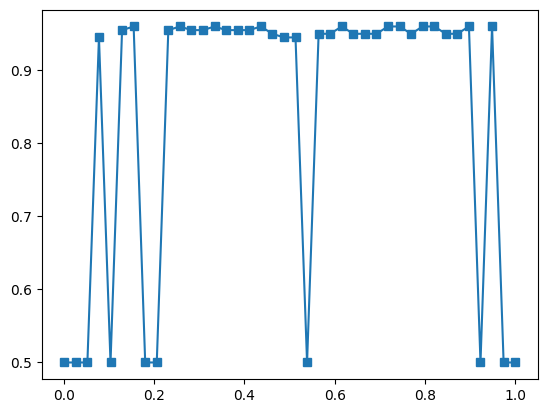

In [38]:
plt.plot(all_lr,accByLR,'s-')
plt.show()

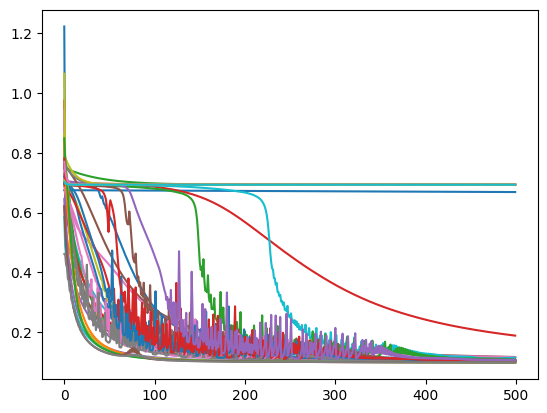

In [40]:
plt.plot(all_losses.detach().T)
plt.show()

In [42]:
n_exp=50
all_acc=torch.zeros(n_exp,len(all_lr))
for exp_i in range(n_exp):
  for i,lr in enumerate(all_lr):
    ann_classify, optimizer, loss_fun=create_model(lr)
    losses,predictions, final_acc=train_model()

    all_acc[exp_i,i]=final_acc

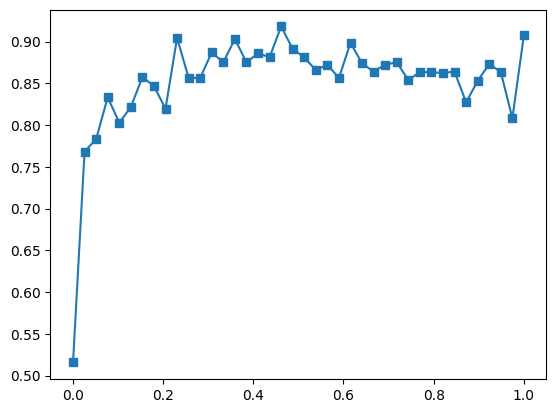

In [44]:
plt.plot(all_lr,torch.mean(all_acc,axis=0),'s-')
plt.show()